# Coordinate Ascent Variational Inference on Probabilistic Count Matrix Factorization

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../')
import utils, inference

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

plt.style.use('ggplot')

## Data generation

In [2]:
N = 500 # number of observations
P = 2 # observation space dimensionality
K = 2 # latent space dimensionality
C = 2 # number of clusters

Y, D, X, R, V, U, clusters = utils.generate_data(N, P, K, C=C, zero_prob=0., eps=5., return_all=True)

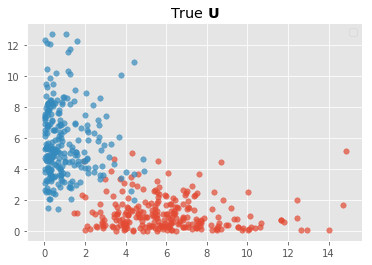

In [3]:
s = 30
alpha = 0.7
labels = []
handlers = []
for c in range(C):
    h = plt.scatter(U[0, int(c*N/C):int((c+1)*N/C)], U[1, int(c*N/C):int((c+1)*N/C)], s=s, alpha=alpha)
    handlers.append(h)
    
plt.legend(handlers, labels, scatterpoints=1)
plt.title('True $\mathbf{U}$')
plt.show()

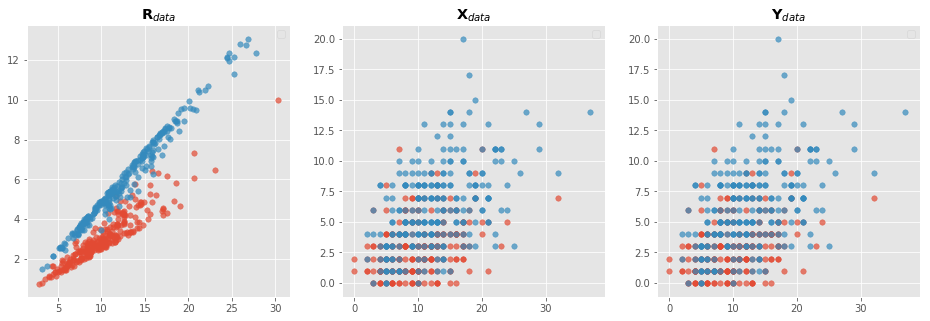

In [4]:
# Plot data
s = 30
alpha = 0.7

fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(1, 3, 1)
handlers = []
for c in range(C):
    h = ax1.scatter(R[int(c*N/C):int((c+1)*N/C), 0], R[int(c*N/C):int((c+1)*N/C), 1], s=s, alpha=alpha)
    handlers.append(h)
ax1.legend(handlers, labels, scatterpoints=1)
plt.title('$\mathbf{R}_{data}$')

ax2 = plt.subplot(1, 3, 2)
handlers = []
for c in range(C):
    h = ax2.scatter(X[int(c*N/C):int((c+1)*N/C), 0], X[int(c*N/C):int((c+1)*N/C), 1], s=s, alpha=alpha)
    handlers.append(h)
ax2.legend(handlers, labels, scatterpoints=1)
plt.title('$\mathbf{X}_{data}$')

ax3 = plt.subplot(1, 3, 3)
handlers = []
for c in range(C):
    h = ax3.scatter(Y[int(c*N/C):int((c+1)*N/C), 0], Y[int(c*N/C):int((c+1)*N/C), 1], s=s, alpha=alpha)    
    handlers.append(h)
ax3.legend(handlers, labels, scatterpoints=1)
plt.title('$\mathbf{Y}_{data}$')

plt.show()

In [5]:
# PCA on the observations
pca = PCA(n_components=2).fit_transform(Y)

In [6]:
alpha = np.ones((2, K))
beta = np.ones((2, P, K))
pi = np.ones((P,)) * 0.5

cavi = inference.Inference(Y, alpha, beta, pi)

In [7]:
cavi.run_cavi(n_iterations=200, return_elbo=False)

Ran 200 iterations of CAVI.


In [8]:
# Use the means of the variational posterior approximations of U and V as their estimates
est_U = cavi.a[0] / cavi.a[1]
est_V = cavi.b[0] / cavi.b[1]

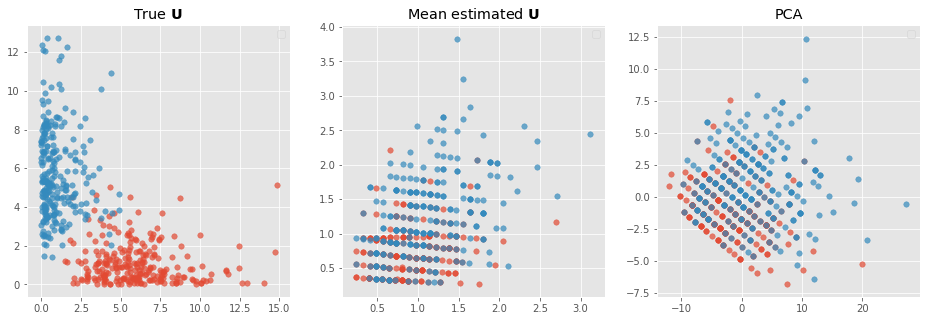

In [9]:
# Plot data
s = 30
alpha = 0.7

fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(1, 3, 1)
handlers = []
for c in range(C):
    h = ax1.scatter(U[0, int(c*N/C):int((c+1)*N/C)], U[1, int(c*N/C):int((c+1)*N/C)], s=s, alpha=alpha)
    handlers.append(h)
ax1.legend(handlers, labels, scatterpoints=1)
plt.title('True $\mathbf{U}$')

ax2 = plt.subplot(1, 3, 2)
handlers = []
for c in range(C):
    h = ax2.scatter(est_U[int(c*N/C):int((c+1)*N/C), 0], est_U[int(c*N/C):int((c+1)*N/C), 1], s=s, alpha=alpha)
    handlers.append(h)
ax2.legend(handlers, labels, scatterpoints=1)
plt.title('Mean estimated $\mathbf{U}$')

ax3 = plt.subplot(1, 3, 3)
handlers = []
for c in range(C):
    h = ax3.scatter(pca[int(c*N/C):int((c+1)*N/C), 0], pca[int(c*N/C):int((c+1)*N/C), 1], s=s, alpha=alpha)
    handlers.append(h)
ax3.legend(handlers, labels, scatterpoints=1)
plt.title('PCA')

plt.show()

In [10]:
pcmf_silh = silhouette_score(est_U, clusters)
pca_silh = silhouette_score(pca, clusters)

scores = {'pCMF': pcmf_silh, 'PCA': pca_silh}
max_key = max(scores, key=scores.get)

print('Silhouette scores (higher is better):')
for key in scores:
    if key == max_key: print('\033[1m', end="")
    print('- ' + key + ': %0.3f' % scores[key] + '\033[0m')

Silhouette scores (higher is better):
- pCMF: 0.119
- PCA: 0.091
